https://arxiv.org/pdf/2501.13809

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from dotenv import load_dotenv
import seaborn as sns
import scipy.stats as stats
import datashader as ds
import datashader.transfer_functions as tf
from datashader.mpl_ext import dsshow

In [2]:
load_dotenv(dotenv_path='.env')

True

In [3]:
iso = os.environ['ISOCHRONE']
iso_ruwe = os.environ['ISOCHRONE_RUWE']
gyc = os.environ['GYROCHRONOLOGY']

Reading isochrone data

In [4]:
colspecs_iso = [
    (0, 8),    # KIC
    (9, 14),   # Mstar
    (15, 20),  # E_Mstar
    (21, 27),  # e_Mstar
    (28, 35),  # Teff
    (36, 42),  # E_Teff
    (43, 50),  # e_Teff
    (51, 57),  # logg
    (58, 63),  # E_logg
    (64, 70),  # e_logg
    (71, 77),  # FeH
    (78, 83),  # E_FeH
    (84, 90),  # e_FeH
    (91, 98),  # Rstar
    (99, 106), # E_Rstar
    (107, 115),# e_Rstar
    (116, 122),# rho
    (123, 129),# E_rho
    (130, 136),# e_rho
    (137, 143),# Lstar
    (144, 150),# E_Lstar
    (151, 157),# e_Lstar
    (158, 163),# Age
    (164, 165),# f_Age
    (166, 171),# E_Age
    (172, 178),# e_Age
    (179, 186),# Dist
    (187, 193),# E_Dist
    (194, 201),# e_Dist
    (202, 207),# Avmag
    (208, 214),# GOF
    (215, 222) # TAMS
]

columns_iso = [
    "KIC", "Mstar", "E_Mstar", "e_Mstar", "Teff", "E_Teff", "e_Teff", 
    "logg", "E_logg", "e_logg", "FeH", "E_FeH", "e_FeH", "Rstar", 
    "E_Rstar", "e_Rstar", "rho", "E_rho", "e_rho", "Lstar", "E_Lstar", 
    "e_Lstar", "Age", "f_Age", "E_Age", "e_Age", "Dist", "E_Dist", 
    "e_Dist", "Avmag", "GOF", "TAMS"
]

In [5]:
iso = pd.read_fwf(iso, colspecs=colspecs_iso, names=columns_iso, skiprows=45)
iso.head()

,KIC,Mstar,E_Mstar,e_Mstar,Teff,E_Teff,e_Teff,logg,E_logg,e_logg,...,Age,f_Age,E_Age,e_Age,Dist,E_Dist,e_Dist,Avmag,GOF,TAMS
0,757076,1.396,0.179,-0.218,5052.2,103.9,-86.6,3.373,0.067,-0.081,...,2.47,NaN,1.82,-0.73,651.5,22.6,-21.6,0.371,1.0,2.69
1,757099,0.873,0.054,-0.039,5364.9,102.7,-84.9,4.318,0.037,-0.029,...,15.20,NaN,3.00,-3.98,367.8,7.1,-6.9,0.340,1.0,17.18
2,757137,1.669,0.309,-0.300,4628.7,84.8,-76.2,2.388,0.083,-0.086,...,1.51,NaN,1.06,-0.58,568.4,12.2,-11.6,0.344,1.0,1.66
3,757280,1.715,0.086,-0.089,6856.8,144.4,-139.9,3.834,0.033,-0.032,...,1.24,NaN,0.20,-0.16,822.0,19.4,-21.0,0.496,1.0,1.62
4,757450,0.914,0.062,-0.057,5301.2,111.0,-103.1,4.432,0.045,-0.044,...,9.46,NaN,5.36,-5.15,829.6,24.0,-23.4,0.465,1.0,16.10


In [6]:
colspecs_iso_ruwe = [
    (0, 8),    # KIC
    (9, 16),   # gmag
    (17, 23),  # e_gmag
    (24, 31),  # Ksmag
    (32, 37),  # e_Ksmag
    (38, 45),  # Par
    (46, 52),  # e_Par
    (53, 59),  # [Fe/H]
    (60, 64),  # e_[Fe/H]
    (65, 72),  # RUWE
    (73, 74),  # Ncomp
    (75, 89),  # KsCorr
    (90, 95)   # State
]

columns_iso_ruwe = [
    'KIC', 'gmag', 'e_gmag', 'Ksmag', 'e_Ksmag', 'Par', 'e_Par', 
    '[Fe/H]', 'e_[Fe/H]', 'RUWE', 'Ncomp', 'KsCorr', 'State'
]


In [7]:
iso_ruwe = pd.read_fwf(iso_ruwe, colspecs=colspecs_iso_ruwe, names=columns_iso_ruwe, skiprows=42)
iso_ruwe.head()

,KIC,gmag,e_gmag,Ksmag,e_Ksmag,Par,e_Par,[Fe/H],e_[Fe/H],RUWE,Ncomp,KsCorr,State
0,757076,12.3510,0.0203,9.559,0.017,1.5239,0.0483,NaN,NaN,0.9467,0,NaN,NaN
1,757099,13.7040,0.0200,11.094,0.018,2.7082,0.0272,NaN,NaN,2.1728,0,NaN,NaN
2,757137,10.0523,0.0279,6.722,0.017,1.7534,0.0253,NaN,NaN,0.9126,0,NaN,RGB
3,757280,12.1329,0.0200,10.627,0.018,1.2137,0.0220,NaN,NaN,0.8704,0,NaN,NaN
4,757450,15.8950,0.0202,13.118,0.029,1.1989,0.0261,0.229,0.15,1.0300,0,NaN,NaN


Reading gyrochronology data

In [8]:
colspecs_gyc = [
    (0, 19),   # source_id
    (20, 28),  # KIC
    (29, 35),  # Prot
    (36, 41),  # bprp0
    (42, 48),  # absGMag
    (49, 55),  # Teff
    (56, 63),  # Age
    (64, 72),  # E_Age
    (73, 81)   # e_Age
]

columns_gyc = [
    "source_id", "KIC", "Prot", "bprp0", "absGMag", "Teff", "Age", "E_Age", "e_Age"
]


In [9]:
gyc = pd.read_fwf(gyc, colspecs=colspecs_gyc, names=columns_gyc, skiprows=19)
gyc.head()

,source_id,KIC,Prot,bprp0,absGMag,Teff,Age,E_Age,e_Age
0,2050231848829944320,757450,19.12,0.956,5.261,5380.0,2.4218,0.04789,-0.08601
1,2050234735047928320,892195,21.78,0.966,5.211,5354.2,2.6313,0.03127,-0.01921
2,2050232256840088960,892713,5.78,0.642,1.430,6353.9,1.6279,0.10062,-0.08327
3,2050238579046093312,893209,4.58,0.713,3.387,6113.8,0.7684,0.01689,-0.01575
4,2050237758705104896,893286,24.54,0.959,5.497,5371.7,3.2722,0.04236,-0.05392


In [10]:
G = 6.67430e-8  # Gravitational constant in cm^3 g^-1 s^-2
M_sun = 1.989e33  # Solar mass in grams
R_sun = 6.955e10  # Solar radius in cm
Teff_sun = 5777  # Solar effective temperature in Kelvin

def compute_log_g(row):
    Teff = row['Teff']
    absGMag = row['absGMag']
    
    if pd.isna(Teff) or pd.isna(absGMag):
        return np.nan
    
    # Estimate mass (in solar masses)
    M = 10 ** ((4.8 - absGMag) / 5)
    
    # Estimate radius (in solar radii)
    R = (Teff / Teff_sun) ** 2
    
    # Convert mass and radius to CGS units
    M_cgs = M * M_sun
    R_cgs = R * R_sun
    
    # Compute log g
    log_g = np.log10(G * M_cgs / R_cgs**2)
    
    return log_g

In [11]:
gyc['logg'] = gyc.apply(compute_log_g, axis=1)

(5.0, 2.0)

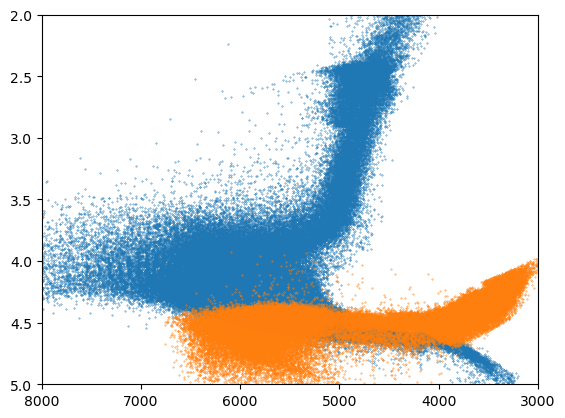

In [12]:
plt.scatter(iso['Teff'], iso['logg'], s=0.1)
plt.scatter(gyc['Teff'], gyc['logg'], s=0.1)

plt.xlim(8000, 3000)
plt.ylim(5.0, 2.0)

### Quality cuts

In [13]:
isc = pd.merge(left=iso, right=iso_ruwe, left_on="KIC", right_on="KIC")

In [14]:
isc_quality = isc[(isc['RUWE'] <= 1.2) & (isc['TAMS'] < 20) & (isc['GOF'] > 0.99)]
len(isc_quality)

142615

In [15]:
isc_quality = isc_quality.dropna(subset=['[Fe/H]'])

In [16]:
iso_gyc = pd.merge(left=isc_quality, right=gyc, left_on='KIC', right_on='KIC', suffixes=('_iso', '_gyc'))

In [17]:
iso_gyc_teff_cut = iso_gyc[((iso_gyc['Teff_iso'] > 3900) & (iso_gyc['Teff_iso'] < 7300)) & ((iso_gyc['Teff_gyc'] > 3900) & (iso_gyc['Teff_gyc'] < 7300))]

In [18]:
df = iso_gyc_teff_cut[((iso_gyc_teff_cut['Age_iso'] > 1.5) & (iso_gyc_teff_cut['Age_iso'] < 8)) & ((iso_gyc_teff_cut['Age_gyc'] > 1.5) & (iso_gyc_teff_cut['Age_gyc'] < 8))]

(5.0, 2.0)

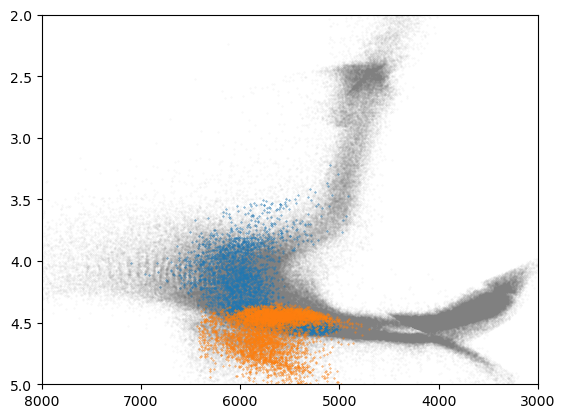

In [19]:
plt.scatter(iso['Teff'], iso['logg'], s=0.1, alpha=0.1, color='gray')
plt.scatter(gyc['Teff'], gyc['logg'], s=0.1, alpha=0.1, color='gray')

plt.scatter(df['Teff_iso'], df['logg_iso'], s=0.1)
plt.scatter(df['Teff_gyc'], df['logg_gyc'], s=0.1)

plt.xlim(8000, 3000)
plt.ylim(5.0, 2.0)

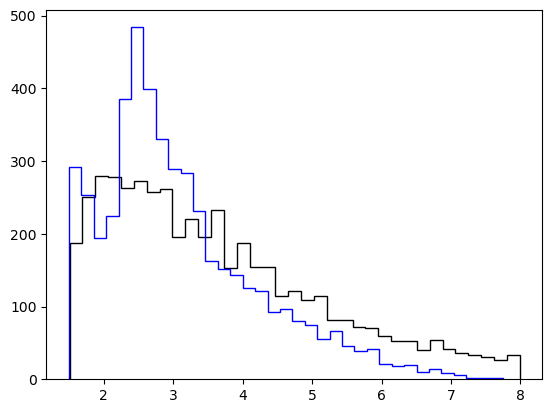

In [20]:
nbins = 35
plt.hist(df['Age_iso'], histtype='step', color='k', label='Isochrone', bins=nbins)
plt.hist(df['Age_gyc'], histtype='step', color='b', label='Gyrochronology', bins=nbins);

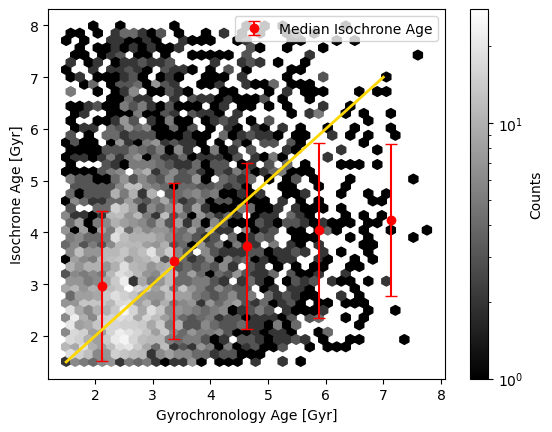

In [21]:
hb = plt.hexbin(df['Age_gyc'], df['Age_iso'], gridsize=40, cmap="gray", bins='log')
bin_means, bin_edges, _ = stats.binned_statistic(df['Age_gyc'], df['Age_iso'], statistic='median', bins=5)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_stds, _, _ = stats.binned_statistic(df['Age_gyc'], df['Age_iso'], statistic='std', bins=5)
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o', color='red', capsize=4, label="Median Isochrone Age")
x = np.linspace(1.5, 7, 100)
plt.plot(x, x, color='gold', linewidth=2)
plt.xlabel("Gyrochronology Age [Gyr]")
plt.ylabel("Isochrone Age [Gyr]")
plt.colorbar(hb, label="Counts")  
plt.legend()

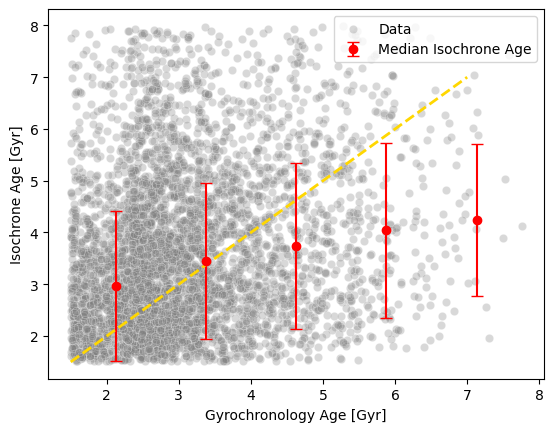

In [22]:
bin_means, bin_edges, _ = stats.binned_statistic(df['Age_gyc'], df['Age_iso'], statistic='median', bins=5)
bin_stds, _, _ = stats.binned_statistic(df['Age_gyc'], df['Age_iso'], statistic='std', bins=5)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
sns.scatterplot(x=df['Age_gyc'], y=df['Age_iso'], alpha=0.3, label="Data", color="gray") 
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o', color='red', capsize=4, label="Median Isochrone Age")
x = np.linspace(1.5, 7, 100)
plt.plot(x, x, color='gold', linewidth=2, linestyle='--')
plt.xlabel("Gyrochronology Age [Gyr]")
plt.ylabel("Isochrone Age [Gyr]")
plt.legend()